In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.datasets import load_iris
import graphviz 
import matplotlib.pyplot as plt

In [3]:
genpath = 'C:\Data\gender_cleaned_test_train.xlsx'

In [5]:
train_df = pd.read_excel(genpath, sheet_name='train')
test_df = pd.read_excel(genpath, sheet_name='test')

Use decision trees to predict IsHealthy and plot the resulting tree

#### No Feature engineering

In [7]:
X = train_df[['Height', 'Weight']]
y = train_df['IsHealthy']

In [14]:
#clf = tree.DecisionTreeRegressor()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [15]:
train_df['IsHealthy_hat'] = clf.predict(X)
test_df['IsHealthy_hat'] = clf.predict(test_df[['Height', 'Weight']])

In [16]:
accuracy_score(test_df['IsHealthy'], test_df['IsHealthy_hat'])

0.985014985014985

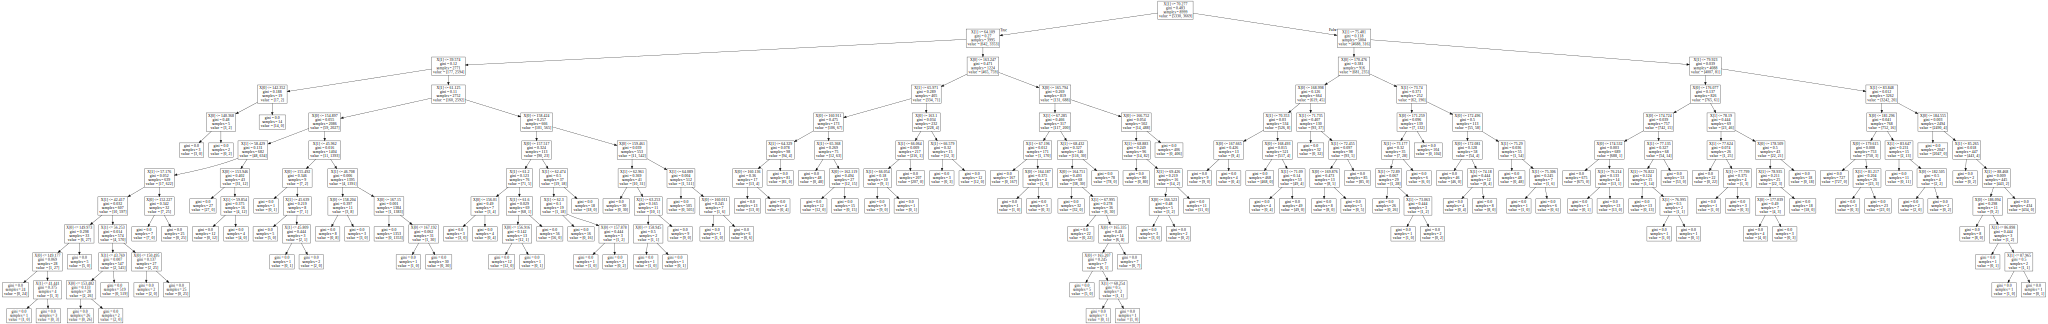

In [19]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

#### With Feature engineering

In [27]:
train_df['w/h2'] = (train_df['Weight']/(train_df['Height']**2))


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_df[['w/h2']],train_df['IsHealthy'])
test_df['w/h2'] = (test_df['Weight']/(test_df['Height']**2))
test_df['IsHealthy_hat']=clf.predict(test_df[['w/h2']])

In [28]:
accuracy_score(test_df['IsHealthy'], test_df['IsHealthy_hat'])

1.0

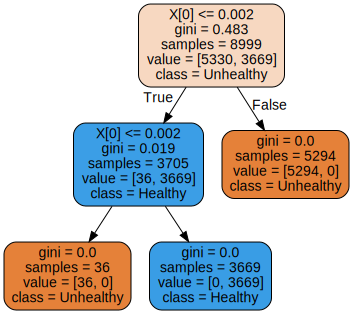

In [32]:
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, class_names=['Unhealthy', 'Healthy'])
graph = graphviz.Source(dot_data)
graph